```mermaid
graph LR
    A[简单线性回归
    （提出问题）]--> B[确定变量
    （自变量、因变量）]
    B--> C[参数估计
    （OLS）]
    C-->E[模型评估]
    E-->E1[拟合优度]
    C-->D[假设检验]
    D-->D1[线性关系]
    D1---D11[散点图]
    D1---D12[添加多项式项检验]
    D-->D2[零均值]
    D2---D21[模型截距是否必要
    （通过常数项检验）]
    D-->D3[独立性]
    D3---D31[序列相关检验
    （如 Durbin-Watson 检验）	]
    D-->D4[同方差性]
    D4---D41[残差图]
    D4---D42[BP 检验]
    D4---D43[White 检验]
    D-->D5[正态性]
    D5---D51[直方图]
    D5---D52[Q-Q 图]
    D5---D53[Shapiro-Wilk 检验]
    D-->D6[外生性]
    D6---D61[工具变量法]
    D6---D62[Heckman 模型]
```

```mermaid
graph LR
    A[模型假设不满足]-->A1[线性关系假设不通过
    （非线性）]
    A1-->A11[变量非线性转换]
    A1-->A12[多项式回归]
    A1-->A13[非参数 / 半参数模型]
    A13-->A131[广义加性模型（GAM）]
    A13-->A132[样条回归（Spline Regression）]
    A13-->A133[机器学习模型
    （如随机森林）]
    A-->A2[误差零均值假设不通过
    （遗漏变量 / 模型误设）]
    A2-->A21[纳入遗漏变量]
    A2-->A22[修正模型形式]
    A2-->A23[使用代理变量或工具变量]
    A-->A3[误差独立性假设不通过
    （自相关 / 序列相关）]
    A3-->A31[时间序列数据处理]
    A31-->A311[差分法]
    A31-->A312[自回归模型（AR）]
    A31-->A313[广义最小二乘法（GLS）]
    A3-->A32[横截面数据处理]
    A32-->A321[空间滞后模型]
    A32-->A322[空间误差模型]
    A32-->A323[大样本下使用稳健标准误
    （如 Newey-West 标准误）]
    A-->A4[同方差性假设不通过
    （异方差）]
    A4-->A41[加权最小二乘法（WLS）]
    A4-->A42[稳健标准误（Robust SE）]
    A4-->A43[变量转换]
    A-->A5[误差正态性假设不通过]
    A5-->A51[数据转换]
    A5-->A52[非参数方法或自助法]
    A5-->A53[放宽正态假设
    （大样本场景）]
    A-->A6[外生性假设不通过
    （内生性）]
    A6-->A61[工具变量法（IV）]
    A6-->A62[面板数据模型]
    A62-->A621[固定效应模型（FE）]
    A62-->A622[随机效应模型（RE）]
    A6-->A63[处理测量误差]
```

# **简单线性回归模型（Simple Linear Regression Model）**

简单线性回归（即一元线性回归）是统计学中用于分析**一个自变量（X）与一个因变量（Y）之间线性关系**的基础模型，旨在通过自变量的取值预测因变量的平均响应值。以下从定义、数学表达、假设、参数估计、模型检验、应用步骤及案例等方面详细介绍：

## **一、核心定义与数学表达式**

###  **（一） 模型目标**

假设因变量 $  Y  $ 与自变量 $  X  $ 之间存在线性关系，通过拟合直线 $  Y = \beta_0 + \beta_1 X + \varepsilon 
 $，描述 $  X  $ 对 $  Y  $ 的线性影响。

###  **（二）总体模型（理论模型）**

<center>

$ 
Y = \beta_0 + \beta_1 X + \varepsilon
$

</center>

$  \beta_0  $：截距项，表示 $  X=0  $ 时 $  Y  $ 的期望值（可能无实际意义，需结合场景）

$  \beta_1  $：斜率系数，表示 $  X  $ 每增加 1 个单位，$  Y  $ 的平均变化量（若 $  \beta_1 > 0  $ 为正相关，$  \beta_1 < 0  $ 为负相关）

$  \varepsilon  $：随机误差项，满足 $  E(\varepsilon) = 0  $，$  \text{Var}(\varepsilon) = \sigma^2  $（误差服从正态分布假设）

###  **（三）样本模型（拟合模型）**

通过样本数据 $  (X_i, Y_i), i=1,2,...,n  $ 估计参数，得到拟合方程：
<center>

$ 
\hat{Y} = \hat{\beta_0} + \hat{\beta_1} X
 $

</center>

$  \hat{Y}  $：因变量的预测值

$  \hat{\beta_0}, \hat{\beta_1}  $：$  \beta_0, \beta_1  $ 的估计值（通过最小二乘法计算）

残差（Residual）：$  e_i = Y_i - \hat{Y}_i  $，表示观测值与预测值的差异

## **二、基本假设（模型成立的前提）**

### **（一）线性关系假设（Linearity）**

**假设内容**：因变量 $  y  $ 与自变量 $  x  $ 之间存在真实的线性关系，即：
<center>

$ 
  y = \beta_0 + \beta_1 x + \epsilon
   $

</center>

其中 $\beta_0$（截距）、$\beta_1$（斜率）为未知参数，$\epsilon$ 为误差项。

**含义**：$  x  $ 对 $  y  $ 的影响是线性的，不存在二次项、指数项等非线性关系。若违反，模型会遗漏重要信息，导致参数估计偏差。

**检验方法**：

绘制 $  x  $ 与 $  y  $ 的散点图，观察是否呈直线趋势；

添加多项式项（如 $  x^2  $）检验显著性，若显著则说明非线性。

### **（二）误差项零均值假设（Zero Mean of Errors）**

**假设内容**：误差项 $\epsilon$ 的条件数学期望为 0，即对任意 $  x  $，有：
<center>

$ 
  E(\epsilon \mid x) = 0
   $

</center>

**含义**：在给定 $  x  $ 时，未被模型解释的部分（$\epsilon$）平均影响为零，说明模型已正确捕捉 $  x  $ 对 $  y  $ 的线性影响，无系统性偏差。

**违反后果**：若 $  E(\epsilon \mid x) \neq 0  $，模型截距 $\beta_0$ 估计错误，或遗漏重要解释变量。

### **（三）误差项独立假设（Independence of Errors）**

**假设内容**：不同观测值的误差项相互独立，即对任意 $  i \neq j  $，有：
<center>

$ 
  \text{Cov}(\epsilon_i, \epsilon_j) = 0
   $

</center>

**含义**：误差项之间无序列相关（时间序列数据）或空间相关（横截面数据），观测值的误差不相互影响。

**检验方法**：

时间序列数据：Durbin-Watson 检验（判断一阶自相关）；

横截面数据：观察残差图是否存在聚类或周期性模式。

**违反后果**：参数估计的标准误计算错误，导致 t 检验、F 检验失效（p 值不可靠）。

### **（四）同方差性假设（Homoscedasticity）**

**假设内容**：误差项的方差不随 $  x  $ 变化，即：

$ 
  \text{Var}(\epsilon \mid x) = \sigma^2 \quad (\sigma^2 \text{为常数})
   $

**含义**：对于所有 $  x  $ 的取值，误差项的离散程度相同，模型对不同 $  x  $ 区间的预测精度一致。

**检验方法**：

残差图：横轴为 $  x  $，纵轴为残差，观察是否有扩散 / 收敛趋势；

统计检验：Breusch-Pagan 检验、White 检验。

**违反后果**：参数估计无偏但标准误无效，假设检验结果不可靠（Type I/II 错误率上升）。

### **（五）误差项正态分布假设（Normality of Errors）**

**假设内容**：误差项 $\epsilon$ 服从正态分布，即：
<center>

$ 
  \epsilon \mid x \sim N(0, \sigma^2)
   $

</center>

**含义**：误差项的分布以 0 为中心对称，且呈钟形曲线，是小样本下假设检验（t 检验、F 检验）和置信区间估计的理论基础。

**检验方法**：

可视化：残差直方图、Q-Q 图（观察是否接近正态分布）；

统计检验：Shapiro-Wilk 检验、Kolmogorov-Smirnov 检验。

**违反后果**：小样本时检验结果不准确，大样本下因中心极限定理可放宽此假设。

### **（六）自变量无完全共线性（No Perfect Collinearity）**

**假设内容（隐含假设）**：自变量 $  x  $ 不是常数，且不存在完全线性关系（一元回归中自动满足，因只有一个自变量）。

**含义**：若 $  x  $ 为常数（所有观测值相同），则无法估计斜率 $\beta_1$，模型无意义。

### **（七）自变量外生性假设（Exogeneity）**

**假设内容**：自变量 $  x  $ 与误差项 $\epsilon$ 不相关，即：
<center>

$ 
  \text{Cov}(x, \epsilon) = 0
   $

</center>

**含义**：$  x  $ 是外生变量，其变化不依赖于未观测因素（$\epsilon$ 包含的内容），即因果关系方向明确（$  x \to y  $）。

**违反后果**：若存在内生性（如遗漏变量、测量误差、双向因果），参数估计有偏且不一致（如 OLS 估计量不收敛于真实值）。

### **假设条件总结表**

| **假设** | **数学表达**                                                  | **核心作用**      | **检验方法**                | **违反后果**         |
| ------ | --------------------------------------------------------- | ------------- | ----------------------- | ---------------- |
| 线性关系   | $  y = \beta_0 + \beta_1 x + \epsilon  $                  | 确保模型形式正确      | 散点图、添加非线性项检验            | 参数估计偏差，模型拟合不足    |
| 误差零均值  | $  E(\epsilon \mid x) = 0  $                              | 模型无系统性偏差      | 残差均值检验                  | 截距估计错误，遗漏关键变量    |
| 误差独立性  | $  \text{Cov}(\epsilon_i, \epsilon_j) = 0 \ (i \neq j)  $ | 避免误差项相关性影响标准误 | Durbin-Watson 检验、残差自相关图 | 标准误计算错误，检验失效     |
| 同方差性   | $  \text{Var}(\epsilon \mid x) = \sigma^2  $              | 保证方差稳定，标准误有效  | 残差图、BP/White 检验         | 标准误偏差，检验结果不可靠    |
| 误差正态性  | $  \epsilon \sim N(0, \sigma^2)  $                        | 支持小样本假设检验     | Q-Q 图、Shapiro-Wilk 检验   | 小样本检验失效，区间估计不准确  |
| 无完全共线性 | $  x  $ 非常数且无完全线性关系                                       | 保证参数可识别       | 自动满足（一元回归）              | 模型不可估计（仅多元回归需关注） |
| 外生性    | $  \text{Cov}(x, \epsilon) = 0  $                         | 确保因果关系无混淆     | 工具变量法、Heckman 模型        | 参数估计有偏且不一致       |

### **关键说明**

**假设的严格性**：

前四个假设（线性、零均值、独立、同方差）是模型有效性的基础，影响参数估计的无偏性和有效性；

正态性假设主要服务于统计推断，大样本下可放宽（依赖中心极限定理）。

**一元与多元回归的差异**：

一元回归无需考虑多重共线性（因只有一个自变量），但需额外关注外生性和线性关系的合理性。

通过验证上述假设，可确保回归模型的可靠性，必要时需采用修正方法（如加权最小二乘法处理异方差，工具变量解决内生性）。

## **三、当一元线性回归假设不通过时的解决策略**

若模型假设不满足，需根据具体问题针对性修正。以下是常见假设违反时的诊断与解决方法：

### **（一）线性关系假设不通过（非线性）**

#### **问题表现：**

散点图显示曲线趋势（如抛物线、指数增长）；

残差图呈现系统性弯曲（如先增后减）；

添加多项式项后系数显著（如 $  x^2  $ 的 $  p < 0.05  $）。

#### **解决方法：**

**变量非线性转换**

对 $  x  $ 或 $  y  $ 进行对数、平方、开方等变换，使关系线性化。

例：若 $  y \propto x^k  $，拟合 $  \ln y = \beta_0 + k \ln x + \epsilon  $。

**多项式回归**

引入 $  x  $ 的高次项（如二次项 $  x^2  $、三次项 $  x^3  $），模型形式：
<center>

$ 
     y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_k x^k + \epsilon
      $

</center>

通过显著性检验保留必要项（如仅 $  x^2  $ 显著则保留二次模型）。

**非参数 / 半参数模型**

使用广义加性模型（GAM）：$  y = \beta_0 + f(x) + \epsilon  $，其中 $  f(x)  $ 为光滑函数；

样条回归（Spline Regression）或机器学习模型（如随机森林）捕捉复杂非线性关系。

### **（二）误差零均值假设不通过（遗漏变量 / 模型误设）**

#### **问题表现：**

残差均值显著不为零（如 t 检验 $  p < 0.05  $）；

新增变量后原参数估计值变化超过 10%（存在遗漏变量偏差）。

#### **解决方法：**

**纳入遗漏变量**

通过理论分析或数据探索，识别与 $  x  $ 和 $  y  $ 均相关的变量 $  z  $，扩展模型为多元回归：
<center>

$ 
     y = \beta_0 + \beta_1 x + \beta_2 z + \epsilon
      $

</center>

例：研究 “教育年限（$  x  $” 对 “收入（$  y  $” 的影响时，遗漏 “工作经验（$  z  $” 可能导致零均值假设失效。

**修正模型形式**

检查是否遗漏交互项（如 $  x \times z  $）或函数形式错误（如应使用 $  \ln x  $ 而非 $  x  $）。

**使用代理变量或工具变量**

若无法获取真实遗漏变量，用代理变量（如 “家庭背景” 用 “父母教育程度” 代理）；

内生性场景下，采用工具变量法（IV，见外生性假设部分）。

### **（三）误差独立性假设不通过（自相关 / 序列相关）**

#### **问题表现：**

时间序列数据中，Durbin-Watson 统计量显著偏离 2（如 $  DW < 1.5  $ 或 $  DW > 2.5  $）；

残差图显示周期性模式（如连续多个正残差后连续负残差）。

#### **解决方法：**

**时间序列数据处理**

**差分法**：对 $  y  $ 或 $  x  $ 进行一阶差分（$  \Delta y_t = y_t - y_{t-1}  $），消除趋势或自相关；

**自回归模型（AR）**：引入滞后残差项，如 AR (1) 模型：
<center>

$ 
     y_t = \beta_0 + \beta_1 x_t + \rho \epsilon_{t-1} + \epsilon_t \quad (\rho \text{为自相关系数})
      $

</center>

**广义最小二乘法（GLS）**：已知自相关结构（如 AR (1)）时，通过加权修正相关性。

**横截面数据处理**

检查空间相关性（如地区数据），改用空间滞后模型或空间误差模型；

大样本下使用稳健标准误（如 Newey-West 标准误），修正自相关对标准误的影响。

### **（四）同方差性假设不通过（异方差）**

#### **问题表现：**

残差图呈 “漏斗形”（如 $  x  $ 增大时残差范围扩大）；

Breusch-Pagan 检验或 White 检验显著（$  p < 0.05  $）。

#### **解决方法：**

**加权最小二乘法（WLS）**

假设方差与 $  x  $ 的函数相关（如 $  \text{Var}(\epsilon) \propto x^2  $），赋予观测值权重 $  w_i = 1/\text{Var}(\epsilon_i)  $，最小化：
<center>

$ 
     \sum w_i (y_i - \hat{y}_i)^2
      $

</center>

权重常通过残差绝对值与 $  x  $ 的回归估计（如 $  |e_i| = \alpha_0 + \alpha_1 x_i + v_i  $）。

**稳健标准误（Robust SE）**

不改变参数估计，仅使用异方差稳健标准误（如 White 标准误），适用于大样本（$  n > 30  $）。

**变量转换**

对因变量取对数（$  \ln y  $）或平方根（$  \sqrt{y}  $），通常可缓解方差随 $  y  $ 增大而增大的问题。

### **（五）误差正态性假设不通过**

#### **问题表现：**

残差 Q-Q 图显著偏离对角线（数据点系统性高于或低于理论分位数）；

Shapiro-Wilk 检验拒绝正态分布（$  p < 0.05  $）。

#### **解决方法：**

**数据转换**

使用 Box-Cox 变换（寻找最优幂次 $  \lambda  $ 使 $  y^\lambda  $ 接近正态）；

对右偏数据取对数（$  \ln y  $），左偏数据取负对数（$  -\ln y  $）。

**非参数方法或自助法**

采用非参数回归（如局部加权回归 LOESS），不假设误差分布；

小样本时使用自助法（Bootstrap）：通过有放回抽样生成数千次样本，计算参数估计的置信区间。

**放宽正态假设（大样本场景）**

根据中心极限定理，当 $  n \geq 30  $ 时，参数估计近似正态分布，假设检验仍有效。

#### **（六）外生性假设不通过（内生性）**

#### **问题表现：**

自变量 $  x  $ 与误差项 $  \epsilon  $ 相关（如遗漏关键变量、测量误差、双向因果）；

工具变量相关性检验显著（如弱工具变量检验拒绝 “弱相关” 假设）。

#### **解决方法：**

**工具变量法（IV）**

**核心步骤**：

寻找工具变量 $  z  $，满足：

**相关性**：$  \text{Cov}(z, x) \neq 0  $（与内生变量 $  x  $ 相关）；

**外生性**：$  \text{Cov}(z, \epsilon) = 0  $（与误差项不相关）。

两阶段最小二乘法（2SLS）：

第一阶段：$  x = \pi_0 + \pi_1 z + v  $，得到预测值 $  \hat{x}  $；

第二阶段：$  y = \beta_0 + \beta_1 \hat{x} + \epsilon  $，用 $  \hat{x}  $ 替代原 $  x  $ 估计参数。

例：用 “距学校距离” 作为 “教育年限” 的工具变量（假设距学校越近，教育年限越长，且不直接影响收入）。

**面板数据模型**

若有个体或时间固定效应，使用固定效应模型（FE）或随机效应模型（RE），控制不随时间 / 个体变化的遗漏变量。

**处理测量误差**

若 $  x  $ 存在测量误差（如问卷报告偏差），通过多重插补或引入可靠性比率调整模型。

### **通用解决步骤总结**

**假设诊断**

通过残差分析（散点图、Q-Q 图）和统计检验（如 DW 检验、BP 检验）定位问题。

**优先修正核心假设**

线性关系、零均值、外生性是模型成立的前提，若违反需从模型层面调整（如增加变量、改变函数形式）。

**选择技术修正方法**

异方差 / 自相关：用 WLS、稳健标准误、GLS；

非线性：用变量转换、多项式回归、GAM；

内生性：用 IV、面板数据模型。

**重新验证假设**

修正后再次检验假设，确保新模型满足核心条件，再进行参数推断（如 t 检验、置信区间）。

### **关键原则**

**理论优先于数据**：

变量转换或模型调整需符合学科理论（如 “收入” 取对数符合边际效应递减规律），避免过度数据拟合。

**权衡方法复杂度**：

小样本：优先解决正态性（用自助法）、内生性（严格筛选工具变量）；

大样本：可接受轻微异方差 / 非正态，用稳健标准误即可。

**报告修正过程**：

明确说明原假设违反情况、修正方法及依据（如 “因存在异方差，采用 White 稳健标准误”）。

通过针对性修正，可在假设不满足时提升模型的可靠性，确保统计推断的有效性。

## **四、参数估计：最小二乘法（Ordinary Least Squares, OLS）**

目标：通过最小化  **残差平方和（SSR）**  求解 $  \hat{\beta_0}  $ 和 $  \hat{\beta_1}  $，即：
<center>

$ 
\text{SSR} = \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 = \sum_{i=1}^n (Y_i - \hat{\beta_0} - \hat{\beta_1} X_i)^2
 $

</center>

对 $  \hat{\beta_0}  $ 和 $  \hat{\beta_1}  $ 求偏导并令导数为 0，解得：
<center>

$ 
\hat{\beta_1} = \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^n (X_i - \bar{X})^2} = \frac{\text{Cov}(X,Y)}{\text{Var}(X)}
 $

</center>
<center>

$ 
\hat{\beta_0} = \bar{Y} - \hat{\beta_1} \bar{X}
 $

</center>

其中 $  \bar{X}, \bar{Y}  $ 为样本均值

## **五、模型检验与评估**

###  **（一）拟合优度检验（Goodness-of-Fit）**

**决定系数** ：
<center>

$ 
  R^2 = \frac{\text{SSE}}{\text{SST}} = 1 - \frac{\text{SSR}}{\text{SST}}
   $

   </center>

总离差平方和（SST/TSS，Sum of Squares Total/Total Sum of Square）：因变量观测值与均值的总变异，反映数据本身的总波动
<center>

$  \text{SST} = \sum (Y_i - \bar{Y})^2  $

$\text{SST} =\text{SSR}+\text{SSE}$

</center>
回归平方和（SSE/ESS，Explained Sum of Squares）：模型解释的波动，即模型解释的变异，即预测值与均值的差异平方和，反映自变量对因变量的解释能力：
<center>

$  \text{SSE}  = \sum (\hat{Y}_i - \bar{Y})^2  $

 </center>
残差平方和（SSR/RSS，Residual Sum of Squares/Sum Squared Residual）：模型未解释的波动，即未被模型解释的变异，是观测值与预测值的差异平方和，反映误差项的影响：
<center>

$  \text{SSR} = \sum (Y_i - \hat{Y}_i)^2  $

 </center>

$  R^2 \in [0,1]  $，值越接近 1，模型对数据的拟合效果越好

###  **（二）系数显著性检验（t 检验）**

检验假设：<center>

$  H_0: \beta_1 = 0  $（自变量无显著影响） vs $  H_1: \beta_1 \neq 0  $

</center>
计算 t 统计量：
<center>

$ 
  t = \frac{\hat{\beta_1} - \beta_{1,0}}{SE(\hat{\beta_1})} \sim t_{n-2}
   $

</center>

其中 $  SE(\hat{\beta_1})  $ 为斜率估计值的标准误，$  \beta_{1,0}  $ 为假设的斜率值（通常为 0）

若 p 值 < 显著性水平（如 0.05），则拒绝原假设，认为自变量对因变量有显著影响

###  **（三）整体模型显著性检验（F 检验）**

检验假设：
<center>

$  H_0: \beta_1 = 0  $（模型无解释力）。

</center>
F 统计量：
<center>

$ 
  F = \frac{\text{SSR}/1}{\text{SSE}/(n-2)} \sim F_{1, n-2}
   $

</center>
在简单线性回归中，F 检验与 t 检验对斜率的结果等价（因仅有一个自变量）

### **（四）残差分析（假设检验）**

**残差图（Residual Plot）**：绘制残差 vs 自变量或预测值，检查是否存在异方差（漏斗形）或非线性趋势（曲线形）

**正态概率图（Q-Q Plot）**：检验残差是否近似正态分布（点应接近对角线）

**Durbin-Watson 检验**：检测自相关性（时间序列数据中常用）

## **六、应用步骤**

**数据准备**

收集自变量 $  X  $ 和因变量 $  Y  $ 的成对数据，确保数据无严重异常值。

**模型拟合**

使用 OLS 计算截距 $  \hat{\beta_0}  $ 和斜率 $  \hat{\beta_1}  $，得到拟合方程 $  \hat{Y} = \hat{\beta_0} + \hat{\beta_1} X  $。

**假设检验**

通过 t 检验验证斜率 $  \beta_1  $ 的显著性，通过残差图检查线性、方差齐性和正态性假设。

**模型评估**

计算 $  R^2  $ 评估拟合优度，结合业务场景判断模型是否合理。

**预测与解释**

给定 $  X  $ 的新值，计算 $  \hat{Y}  $ 作为预测值；解释斜率 $  \hat{\beta_1}  $ 的实际意义（如 “X 每增加 1 单位，Y 平均增加 / 减少$  \hat{\beta_1}  $单位”）。

## **七、案例：身高与体重的关系**

**数据**：收集 10 名成年人的身高（$  X  $，单位：cm）和体重（$  Y  $，单位：kg），数据如下：
<center>

| 身高 $  X  $ | 160 | 165 | 170 | 175 | 180 | 155 | 162 | 168 | 172 | 185 |
| :----: | :----: | :----: | :----: | :----: | :----: | :----: | :----: | :----: | :----: | :----: |
| 体重 $  Y  $ | 50  | 55  | 60  | 65  | 70  | 45  | 52  | 58  | 62  | 75  |

</center>

**步骤**：

计算均值：
<center>

$  \bar{X} = 169.2  $，$  \bar{Y} = 59.2  $。

</center>

计算斜率 $  \hat{\beta_1}  $：

<center>

$ 
   \hat{\beta_1} = \frac{\sum (X_i - 170)(Y_i - 59.2)}{\sum (X_i - 170)^2} = \frac{1020}{1450} = 1.00
    $

</center>

计算截距 $  \hat{\beta_0}  $：

<center>

$ 
   \hat{\beta_0} = 59.2 - 0.7034 \times 170 = -110.00
    $

</center>

拟合方程：
<center>

$  \hat{Y} = -110.00 + 1.00*X  $

</center>
解释：身高每增加 1cm，体重平均增加约 1kg；截距表示身高为 0cm 时的体重预测值（无实际意义，因身高不可能为 0）。

计算 $  R^2 = 1  $，说明模型解释了 100% 的体重变异，拟合效果极佳。

In [ ]:
######      无包      ######
# 导入数据
X = [160, 165, 170, 175, 180, 155, 162, 168, 172, 185]
y = [50, 55, 60, 65, 70, 45, 52, 58, 62, 75]

# 计算均值
n = len(X)
print(f"样本量：{n}")
mean_X = sum(X) / n
mean_y = sum(y) / n

# 计算斜率
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - mean_X) * (y[i] - mean_y)
    denominator += (X[i] - mean_X) ** 2
beta_1 = numerator / denominator

# 计算截距
beta_0 = mean_y - beta_1 * mean_X

print(f"斜率 (beta_1): {beta_1:.2f}")
print(f"截距 (beta_0): {beta_0:.2f}")

# 计算 TSS
tss = sum((y_i - mean_y) ** 2 for y_i in y)
print(f"总离差平方和 (TSS): {tss:.2f}")

# 计算预测值
y_pred = [beta_0 + beta_1 * x_i for x_i in X]

# 计算 RSS
rss = sum((y[i] - y_pred[i]) ** 2 for i in range(n))
print(f"残差平方和 (RSS): {rss:.2f}")

# 计算 ESS
ess = sum((y_pred_i - mean_y) ** 2 for y_pred_i in y_pred)
print(f"回归平方和 (ESS): {ess:.2f}")

# 输出拟合结果
print("拟合结果：")
print(f"回归方程: y = {beta_1:.2f}x + {beta_0:.2f}")

# 计算 R 方
r_squared = ess / tss
print(f"决定系数 R²: {r_squared:.2f}")
print(f"模型解释了 {r_squared * 100:.2f}% 的因变量变异。")
if r_squared > 0.7:
    print("模型拟合效果较好。")
else:
    print("模型拟合效果一般，可能需要进一步优化或考虑其他模型。")
    
# 计算残差的标准差（标准误）
s = (rss / (n - 2)) ** 0.5

# 计算斜率的标准误
se_beta_1 = s / (denominator ** 0.5)

# 计算截距的标准误
se_beta_0 = s * ((1 / n) + (mean_X ** 2 / denominator)) ** 0.5

# 计算斜率的 t 值
t_beta_1 = beta_1 / se_beta_1

# 计算截距的 t 值
t_beta_0 = beta_0 / se_beta_0

print(f"斜率的 t 值: {t_beta_1:.2f}")
print(f"截距的 t 值: {t_beta_0:.2f}")

自变量 X 的均值: 169.20
因变量 y 的均值: 59.20
总离差平方和 (TSS): 765.60
残差平方和 (RSS): 0.00
回归平方和 (ESS): 765.60
TSS 是否等于 ESS + RSS: True
回归方程为: y = 1.00 * X + -110.00
回归系数（斜率）: 1.00
截距: -110.00
决定系数 R^2: 1.00
身高为173cm时，预测体重为 63.00 kg


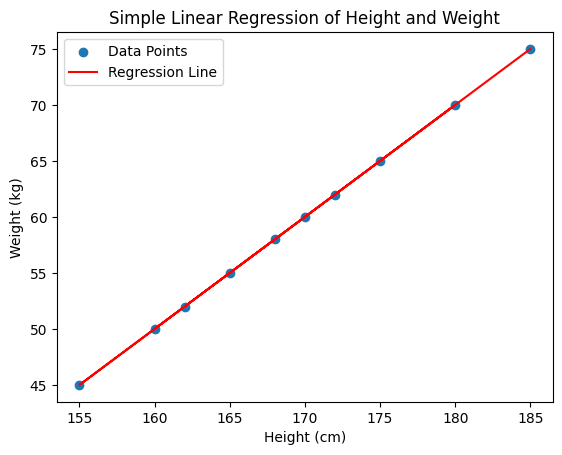

斜率的 t 值: 1741509133207758.50
斜率的 p 值: 0.0000
在1%的显著性水平下显著
截距的 t 值: -1130675945845882.00
截距的 p 值: 0.0000
在1%的显著性水平下显著
残差的均值: -0.00
零均值假设检验 - t 值: -inf, p 值: 0.0000
拒绝零均值假设。
独立性假设检验（Durbin - Watson 检验） - 统计量: 0.00
可能存在残差不独立的情况。
同方差假设检验（Breusch - Pagan 检验） - 统计量: -inf, p 值: 1.0000
不能拒绝同方差假设。
残差无变异，跳过正态性检验。（模型完美拟合）
外生性假设较难直接检验，需从理论和实际背景判断。


d:\Program Files\Python3.9.6\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [64]:
# 调用包
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

# 身高数据
X = np.array([160, 165, 170, 175, 180, 155, 162, 168, 172, 185]).reshape(-1, 1)
# 体重数据
y = np.array([50, 55, 60, 65, 70, 45, 52, 58, 62, 75])

# 计算变量的均值
mean_X = np.mean(X)
mean_y = np.mean(y)
print(f"自变量 X 的均值: {mean_X:.2f}")
print(f"因变量 y 的均值: {mean_y:.2f}")

# 计算 TSS
tss = np.sum((y - mean_y) ** 2)
print(f"总离差平方和 (TSS): {tss:.2f}")

# 创建线性回归模型对象
model = LinearRegression()

# 拟合模型
model.fit(X,y)

# 计算预测值
y_pred = model.predict(X)

# 计算 RSS
rss = np.sum((y - y_pred) ** 2)
print(f"残差平方和 (RSS): {rss:.2f}")

# 计算 ESS
ess = np.sum((y_pred - mean_y) ** 2)
print(f"回归平方和 (ESS): {ess:.2f}")

# 验证 TSS = ESS + RSS
print(f"TSS 是否等于 ESS + RSS: {np.isclose(tss, ess + rss)}")

# 获取回归系数（斜率）和截距
slope = model.coef_[0]
intercept = model.intercept_

# 打印回归方程
print(f"回归方程为: y = {slope:.2f} * X + {intercept:.2f}")
print(f"回归系数（斜率）: {slope:.2f}")
print(f"截距: {intercept:.2f}")

# 输出决定系数 R^2
r2 = model.score(X, y)
print(f"决定系数 R^2: {r2:.2f}")

# 预测身高为173cm时的体重
new_X = np.array([[173]])
predicted_y = model.predict(new_X)
print(f"身高为173cm时，预测体重为 {predicted_y[0]:.2f} kg")

# 绘制散点图和回归直线
plt.scatter(X, y, label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Simple Linear Regression of Height and Weight')
plt.legend()
plt.show()

# 参数检验
n = len(X)
p = 1  # 自变量个数
# 计算残差的标准差
s = np.sqrt(rss / (n - p - 1))
# 计算斜率的标准误
se_slope = s / np.sqrt(np.sum((X - mean_X) ** 2))
# 计算斜率的 t 值
t_slope = slope / se_slope
# 计算斜率的 p 值
p_slope = 2 * (1 - stats.t.cdf(np.abs(t_slope), n - p - 1))

# 计算截距的标准误
se_intercept = s * np.sqrt(1 / n + mean_X ** 2 / np.sum((X - mean_X) ** 2))
# 计算截距的 t 值
t_intercept = intercept / se_intercept
# 计算截距的 p 值
p_intercept = 2 * (1 - stats.t.cdf(np.abs(t_intercept), n - p - 1))

print(f"斜率的 t 值: {t_slope:.2f}")
print(f"斜率的 p 值: {p_slope:.4f}")
if p_slope<0.01:
    print("在1%的显著性水平下显著")
elif p_slope<0.05:
    print("在5%的显著性水平下显著")
elif p_slope<0.1:
    print("在10%的显著性水平下显著")
else:
    print("不显著")
print(f"截距的 t 值: {t_intercept:.2f}")
print(f"截距的 p 值: {p_intercept:.4f}")
if p_intercept<0.01:
    print("在1%的显著性水平下显著")
elif p_intercept<0.05:
    print("在5%的显著性水平下显著")
elif p_intercept<0.1:
    print("在10%的显著性水平下显著")
else:
    print("不显著")

# 计算残差
residuals = y - y_pred

# 零均值假设检验
# 计算残差的均值
residual_mean = np.mean(residuals)
print(f"残差的均值: {residual_mean:.2f}")
# 进行 t 检验，原假设：残差均值为 0
t_stat_zero_mean, p_value_zero_mean = stats.ttest_1samp(residuals, 0)
print(f"零均值假设检验 - t 值: {t_stat_zero_mean:.2f}, p 值: {p_value_zero_mean:.4f}")
if p_value_zero_mean < 0.05:
    print("拒绝零均值假设。")
else:
    print("不能拒绝零均值假设。")

# 独立性假设检验（Durbin - Watson 检验）
dw_stat = sm.stats.stattools.durbin_watson(residuals)
print(f"独立性假设检验（Durbin - Watson 检验） - 统计量: {dw_stat:.2f}")
# 一般认为 DW 值在 1.5 - 2.5 之间表示残差具有独立性
if 1.5 <= dw_stat <= 2.5:
    print("不能拒绝独立性假设。")
else:
    print("可能存在残差不独立的情况。")

# 同方差假设检验（Breusch - Pagan 检验）:数据量太少可能出问题
X_with_const = sm.add_constant(X)
bp_test = het_breuschpagan(residuals, X_with_const)
bp_statistic = bp_test[0]
bp_p_value = bp_test[1]
print(f"同方差假设检验（Breusch - Pagan 检验） - 统计量: {bp_statistic:.2f}, p 值: {bp_p_value:.4f}")
if bp_p_value < 0.05:
    print("拒绝同方差假设。")
else:
    print("不能拒绝同方差假设。")

# 检查残差是否有变异
if np.ptp(residuals) == 0:
    print("残差无变异，跳过正态性检验。（模型完美拟合）")
else:
    stat, p = shapiro(residuals)
    print(f"Shapiro-Wilk检验：统计量={stat:.4f}, p值={p:.4f}")

''' 残差无变异，跳过正态性检验
# 正态性假设检验（Shapiro - Wilk 检验）
shapiro_stat, shapiro_p_value = stats.shapiro(residuals)
print(f"正态性假设检验（Shapiro - Wilk 检验） - 统计量: {shapiro_stat:.2f}, p 值: {shapiro_p_value:.4f}")
if shapiro_p_value < 0.05:
    print("拒绝正态性假设。")
else:
    print("不能拒绝正态性假设。")
'''
    
# 外生性假设较难直接检验，通常从理论和实际背景判断
print("外生性假设较难直接检验，需从理论和实际背景判断。")

## **八、局限性**

**单变量限制**：仅能分析一个自变量与因变量的关系，实际问题常需多元回归

**线性假设**：若真实关系非线性，模型会失效（需通过残差图或非线性变换检验）

**相关性≠因果性**：模型仅描述关联，无法证明因果关系（需结合理论或实验设计）

**异常值敏感**：OLS 对极端值较敏感，需预处理或使用稳健方法（如加权最小二乘）

## **九、拓展**

**加权线性回归**：处理异方差数据（给方差小的观测值更高权重）。

**对数线性回归**：对 $  X  $ 或 $  Y  $ 取对数，转换为线性关系（如幂函数模型 $  Y = aX^b  $ 可通过对数转换为 $  \ln Y = \ln a + b \ln X  $）。

**虚拟变量**：引入分类自变量（如性别、地区），扩展模型应用场景。

